In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels prophet xgboost

In [3]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet


In [7]:
df =pd.read_csv("updated_states_file.csv")
df["Import"]=np.random.uniform(100,200,size=len(df))
df["Export"]=np.random.uniform(100,200,size=len(df))
df["Trade_Balance"]=df["Import"]-df["Export"]
df.to_csv('updated_states_file.csv', index=False)
print("New columns added and saved as 'updated_file.csv'")
df["Trade_Balance"]=df["Import"]-df["Export"]
df.to_csv('updated_states_file.csv', index=False)
print("New columns added and saved as 'updated_states_file.csv'")
df

New columns added and saved as 'updated_file.csv'
New columns added and saved as 'updated_states_file.csv'


,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value,Agriculture,Industry,Services,Exchange Rate,FDI,Govt Spending,Import,Export,Trade_Balance
0,2010-01-31,Andhra Pradesh,1.23,0.69,10.48,7.71,21748.85,19.546938,37.033005,44.388123,104.402085,8.766324,16.558591,130.068445,106.735687,23.332758
1,2010-01-31,Arunachal Pradesh,6.76,2.59,4.27,7.39,10039.56,5.259321,19.810376,53.016188,87.955750,7.400849,13.017891,164.539040,136.404151,28.134889
2,2010-01-31,Assam,7.46,4.84,2.64,6.39,13129.10,18.377560,17.741784,32.512847,77.875625,7.593099,20.421107,184.564390,173.165004,11.399386
3,2010-02-28,Bihar,5.43,0.31,8.26,6.09,23304.58,19.567562,31.316078,53.390666,90.884345,2.991661,12.169552,107.544610,194.461011,-86.916401
4,2010-02-28,Chhattisgarh,0.69,-0.52,11.92,-0.51,16413.03,14.474809,14.880678,50.502031,120.394803,2.060705,19.957941,122.439771,121.735360,0.704411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2023-08-31,Punjab,5.71,-3.85,4.69,8.50,5968.07,11.489778,29.041311,40.832969,55.555461,9.818670,14.869368,191.104465,168.785700,22.318765
496,2023-08-31,Rajasthan,4.82,8.95,10.91,8.87,21731.52,7.660034,26.116495,35.351610,147.778450,7.250961,19.799360,103.706066,186.126691,-82.420625
497,2023-09-30,Sikkim,7.32,0.61,9.36,4.58,38924.38,9.784287,15.795251,31.504488,97.408711,3.198771,12.849628,178.088752,151.968836,26.119917
498,2023-10-31,Tamil Nadu,8.04,-2.23,2.89,8.04,39107.07,6.888770,34.370197,56.126936,66.425394,2.885326,19.694978,198.289239,143.844970,54.444269


         Date            Country  Inflation Rate (%)  GDP Growth Rate (%)  \
0  2010-01-31     Andhra Pradesh                1.23                 0.69   
1  2010-01-31  Arunachal Pradesh                6.76                 2.59   
2  2010-01-31              Assam                7.46                 4.84   
3  2010-02-28              Bihar                5.43                 0.31   
4  2010-02-28       Chhattisgarh                0.69                -0.52   

   Unemployment Rate (%)  Interest Rate (%)  Stock Index Value  Agriculture  \
0                  10.48               7.71           21748.85    19.546938   
1                   4.27               7.39           10039.56     5.259321   
2                   2.64               6.39           13129.10    18.377560   
3                   8.26               6.09           23304.58    19.567562   
4                  11.92              -0.51           16413.03    14.474809   

    Industry   Services  Exchange Rate       FDI  Govt Spendin

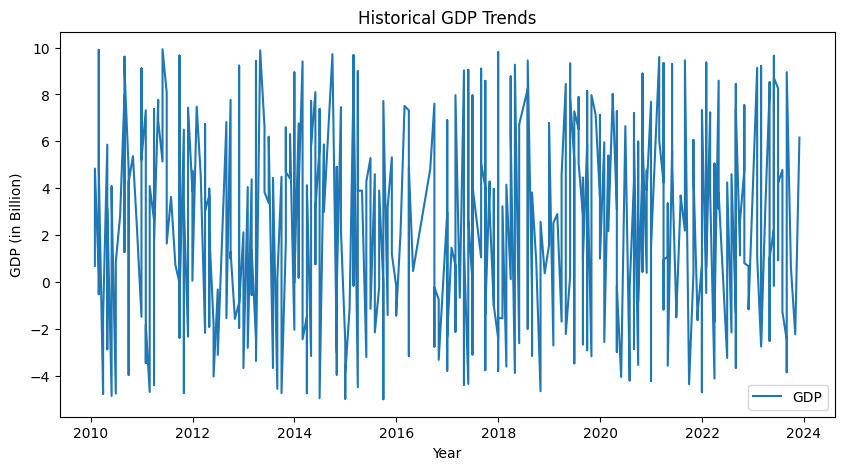

In [ ]:
# Load GDP dataset (Replace with your actual file)
df = pd.read_csv("updated_states_file.csv")

# Show first 5 rows
print(df.head())

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot GDP Trends
plt.figure(figsize=(10,5))
plt.plot(df.index, df['GDP Growth Rate (%)'], label="GDP")
plt.xlabel("Year")
plt.ylabel("GDP (in Billion)")
plt.legend()
plt.title("Historical GDP Trends")
plt.show()


In [10]:
# Calculate GDP Growth Rate (%)
df['GDP Growth Rate'] = df['GDP Growth Rate (%)'].pct_change() * 100

# Compute Sector-wise Contribution (%)
df['Agriculture Contribution'] = (df['Agriculture'] / df['GDP Growth Rate (%)']) * 100
df['Industry Contribution'] = (df['Industry'] / df['GDP Growth Rate (%)']) * 100
df['Services Contribution'] = (df['Services'] / df['GDP Growth Rate (%)']) * 100

# Drop missing values (from pct_change)
df.dropna(inplace=True)

# Show updated data
print(df.head())


         Date            Country  Inflation Rate (%)  GDP Growth Rate (%)  \
1  2010-01-31  Arunachal Pradesh                6.76                 2.59   
2  2010-01-31              Assam                7.46                 4.84   
3  2010-02-28              Bihar                5.43                 0.31   
4  2010-02-28       Chhattisgarh                0.69                -0.52   
5  2010-02-28                Goa                6.10                 9.90   

   Unemployment Rate (%)  Interest Rate (%)  Stock Index Value  Agriculture  \
1                   4.27               7.39           10039.56     5.259321   
2                   2.64               6.39           13129.10    18.377560   
3                   8.26               6.09           23304.58    19.567562   
4                  11.92              -0.51           16413.03    14.474809   
5                  11.80               8.38           17977.64    17.675295   

    Industry   Services  Exchange Rate       FDI  Govt Spendin

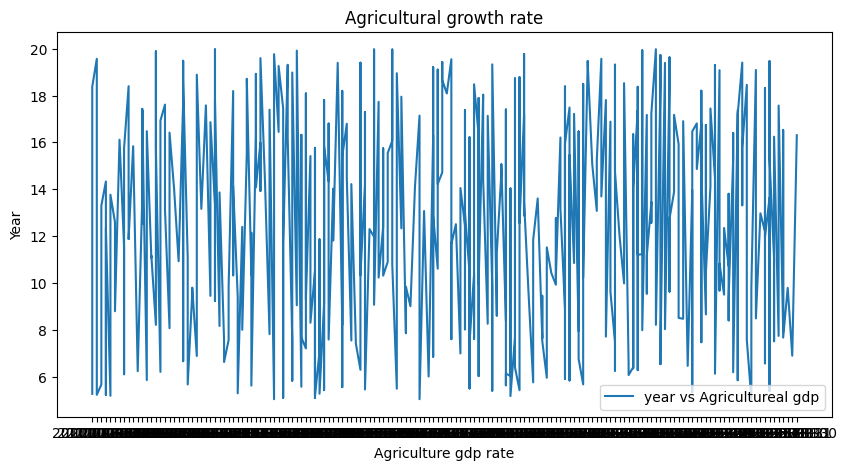

In [18]:

plt.figure(figsize=(10,5))
#colors = ['green' if x > 0 else 'red' if x < 0 else 'gray' for x in df['Trade_Balance']]
plt.plot(df["Date"], df['Agriculture'], label="year vs Agricultureal gdp")
plt.xlabel("Year")
plt.ylabel("Agriculture gdp rate")
plt.legend()
plt.title("Agricultural growth rate")
plt.show()

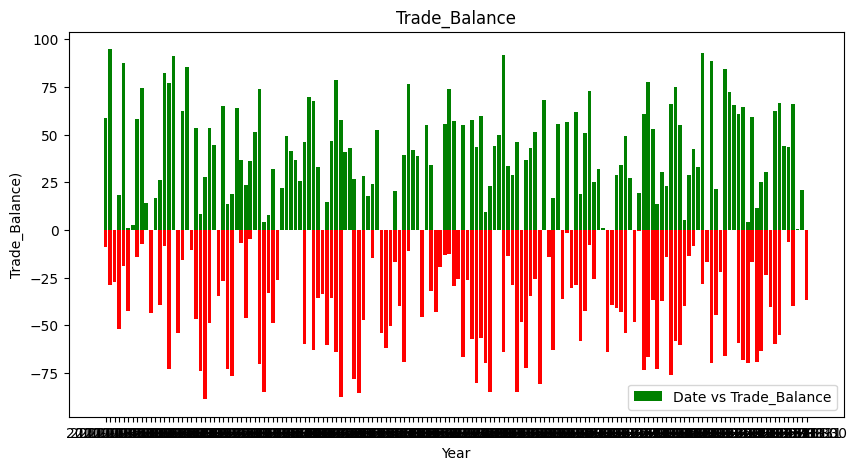

In [ ]:
df =pd.read_csv("economic_indicators_dataset_2010_2023.csv")
df["Import"]=np.random.uniform(100,200,size=len(df))
df["Export"]=np.random.uniform(100,200,size=len(df))
df["Trade_Balance"]=df["Import"]-df["Export"]
df.to_csv('economic_indicators_dataset_2010_2023.csv', index=False)
plt.figure(figsize=(10,5))
colors = ['green' if x > 0 else 'red' if x < 0 else 'gray' for x in df['Trade_Balance']]
# Use df.index to access the dates since 'Date' is the index
plt.bar(df['Date'], df['Trade_Balance'], label="Date vs Trade_Balance",color=colors)
plt.xlabel("Year")
plt.ylabel("Trade_Balance)")
plt.legend()
plt.title("Trade_Balance")
plt.show()

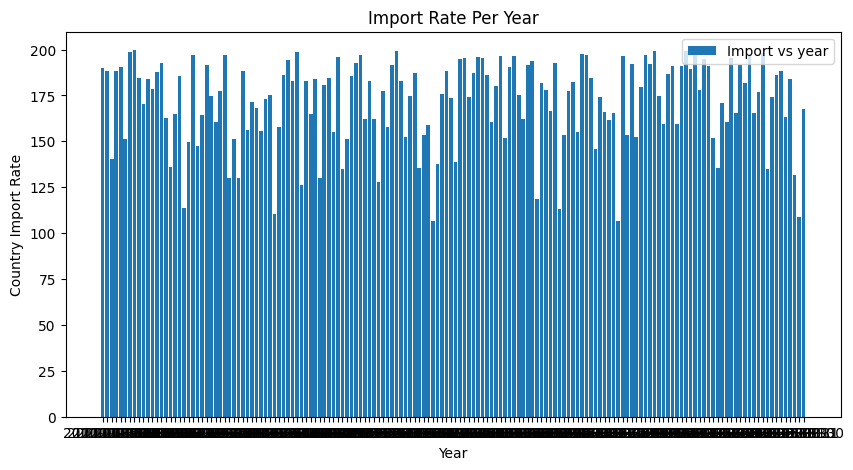

In [ ]:

plt.figure(figsize=(10,5))
#colors = ['green' if x > 0 else 'red' if x < 0 else 'gray' for x in df['Trade_Balance']]
plt.bar(df["Date"], df['Import'], label="Import vs year")
plt.xlabel("Year")
plt.ylabel("Country Import Rate")
plt.legend()
plt.title("Import Rate Per Year")
plt.show()

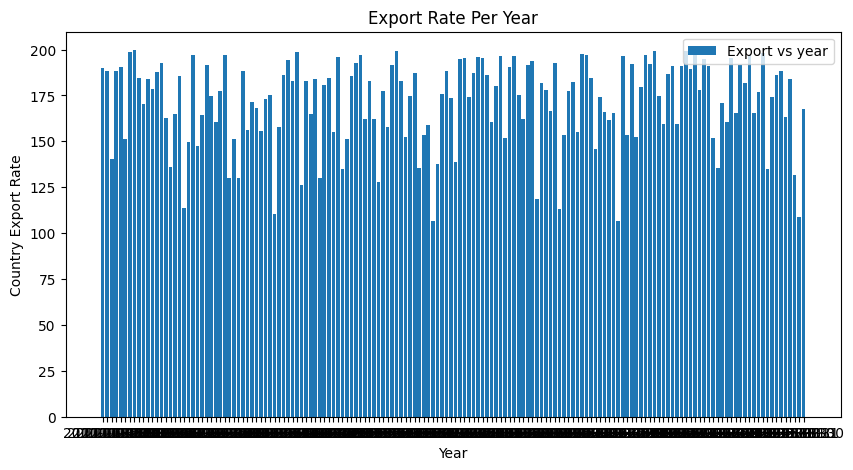

In [ ]:

plt.figure(figsize=(10,5))
#colors = ['green' if x > 0 else 'red' if x < 0 else 'gray' for x in df['Trade_Balance']]
plt.bar(df["Date"], df['Import'], label="Export vs year")
plt.xlabel("Year")
plt.ylabel("Country Export Rate")
plt.legend()
plt.title("Export Rate Per Year")
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4ob_296/tsed0rvy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4ob_296/rkv6dcc0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75836', 'data', 'file=/tmp/tmpk4ob_296/tsed0rvy.json', 'init=/tmp/tmpk4ob_296/rkv6dcc0.json', 'output', 'file=/tmp/tmpk4ob_296/prophet_modelyaqq89_6/prophet_model-20250320205734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:57:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:57:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


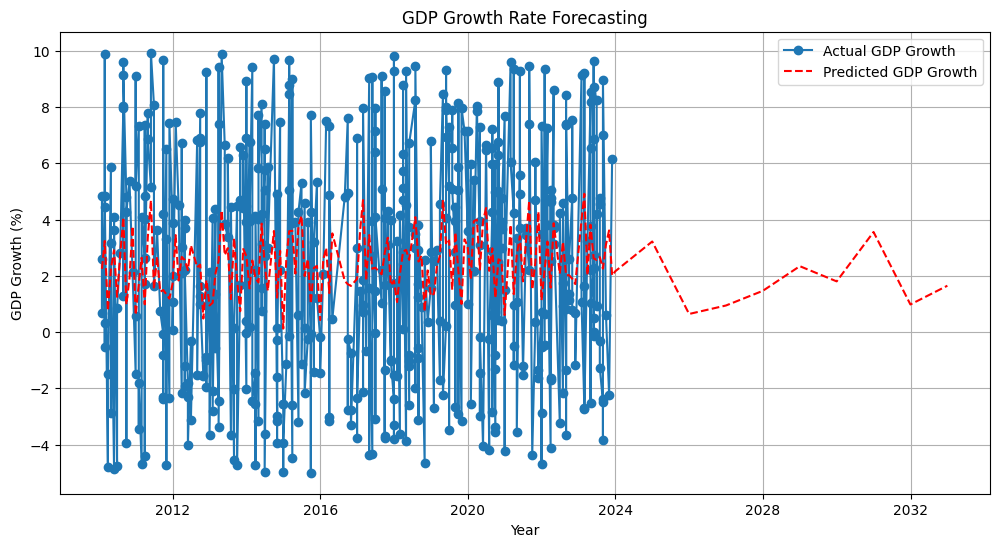

In [5]:
from prophet import Prophet
df = pd.read_csv("economic_indicators_dataset_2010_2023.csv")

# Prepare Data for Prophet Model
# Assuming 'Date' is your date column
gdp_data = df[['Date', 'GDP Growth Rate (%)']].reset_index(drop=True)  # Reset index without adding it as a column
gdp_data.columns = ['ds', 'y']  # Prophet requires 'ds' (date) and 'y' (value)

# Convert 'ds' column to datetime if it's not already
gdp_data['ds'] = pd.to_datetime(gdp_data['ds'])

# Ensure there are no NaNs or Inf values
gdp_data.replace([np.inf, -np.inf], np.nan, inplace=True)
gdp_data.dropna(inplace=True)

# Train Prophet Model
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(gdp_data)

# Make Future Predictions (Next 10 Years)
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

# Plot GDP Growth Prediction
plt.figure(figsize=(12,6))
# Instead of df.index, use gdp_data['ds'] for plotting actual values
plt.plot(gdp_data['ds'], gdp_data['y'], label="Actual GDP Growth", marker='o')
plt.plot(forecast['ds'], forecast['yhat'], label="Predicted GDP Growth", linestyle="dashed", color='red')
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.legend()
plt.title("GDP Growth Rate Forecasting")
plt.grid()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Define Features (X) and Target Variable (y)
X = df[['Agriculture', 'Industry', 'Services', 'Exchange Rate', 'FDI', 'Govt Spending']]
y = df['GDP Growth Rate (%)']

# Handle missing values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)  # Fill NaNs with mean values
y.fillna(y.mean(), inplace=True)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict on Test Data
y_pred = reg_model.predict(X_test)

# Evaluate Model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Model R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


Model R² Score: 0.0248
Mean Absolute Error: 3.3754


<ipython-input-8-f0c2fa16cfa4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-8-f0c2fa16cfa4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)  # Fill NaNs with mean values


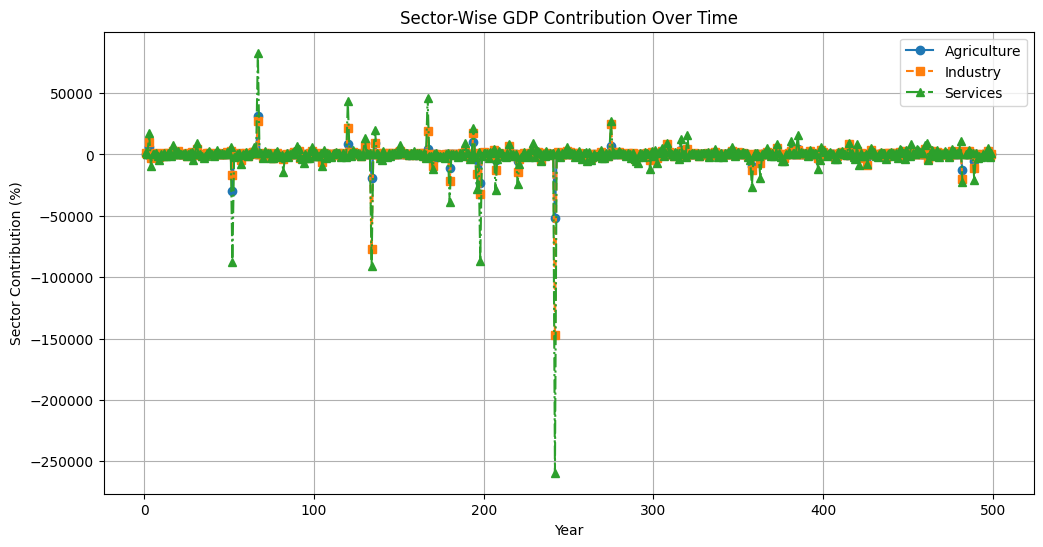

In [11]:
plt.figure(figsize=(12,6))

plt.plot(df.index, df['Agriculture Contribution'], label="Agriculture", linestyle='-', marker='o')
plt.plot(df.index, df['Industry Contribution'], label="Industry", linestyle='--', marker='s')
plt.plot(df.index, df['Services Contribution'], label="Services", linestyle='-.', marker='^')

plt.xlabel("Year")
plt.ylabel("Sector Contribution (%)")
plt.title("Sector-Wise GDP Contribution Over Time")
plt.legend()
plt.grid()
plt.show()


<ipython-input-12-eccb04968be2>:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=df.index[-1], periods=10, freq='Y')


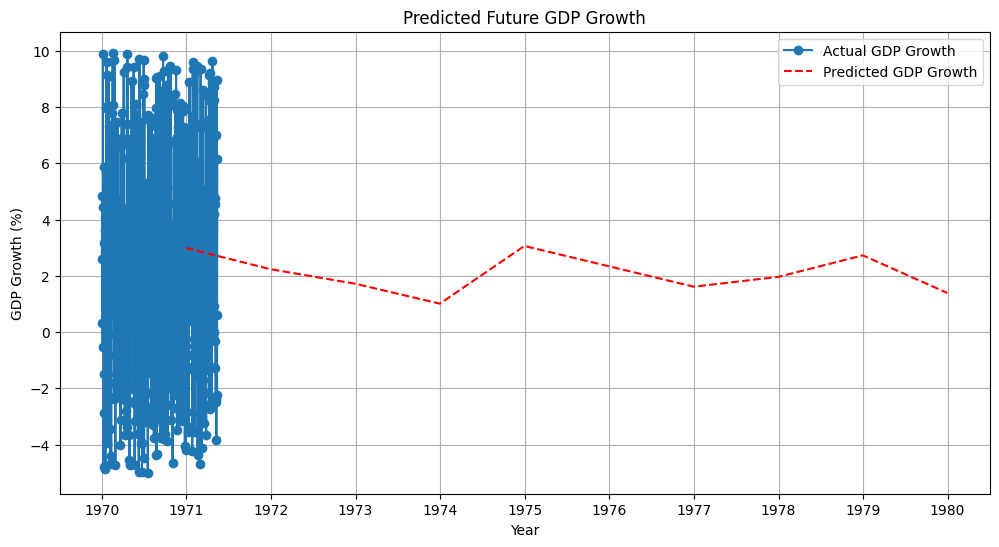

In [12]:
import pandas as pd
import numpy as np

# Generate Future Data for Prediction (Next 10 Years)
future_years = pd.date_range(start=df.index[-1], periods=10, freq='Y')
future_X = pd.DataFrame({
    'Agriculture': np.random.uniform(X['Agriculture'].min(), X['Agriculture'].max(), 10),
    'Industry': np.random.uniform(X['Industry'].min(), X['Industry'].max(), 10),
    'Services': np.random.uniform(X['Services'].min(), X['Services'].max(), 10),
    'Exchange Rate': np.random.uniform(X['Exchange Rate'].min(), X['Exchange Rate'].max(), 10),
    'FDI': np.random.uniform(X['FDI'].min(), X['FDI'].max(), 10),
    'Govt Spending': np.random.uniform(X['Govt Spending'].min(), X['Govt Spending'].max(), 10),
}, index=future_years)

# Predict Future GDP Growth
future_gdp_predictions = reg_model.predict(future_X)

# Plot Predictions
plt.figure(figsize=(12,6))
plt.plot(df.index, df['GDP Growth Rate (%)'], label="Actual GDP Growth", marker='o')
plt.plot(future_years, future_gdp_predictions, label="Predicted GDP Growth", linestyle="dashed", color='red')
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.legend()
plt.title("Predicted Future GDP Growth")
plt.grid()
plt.show()
